

## 1. Data Loading and Exploration:

In [1]:
import pandas as pd

# Load the data from student-scores file
student_data = pd.read_csv('student-scores.csv')

# Display the first few rows of the student_data
print(student_data.head())

# Summary statistics
print(student_data.describe())

# Check for missing values
print(student_data.isnull().sum())

# Print the student_data
print(student_data)


   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [2]:

# Print the student_data columns
print(student_data.columns)


Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')


In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2. Data Visualization: 

## 2.1 Histogram:


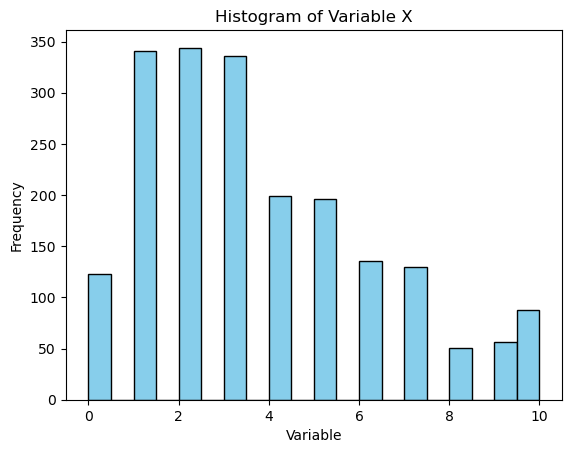

In [4]:
import matplotlib.pyplot as plt

# Histogram of a numerical variable
plt.hist(student_data['absence_days'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Variable X')
plt.show()


## 2.2 Scatter Plot:

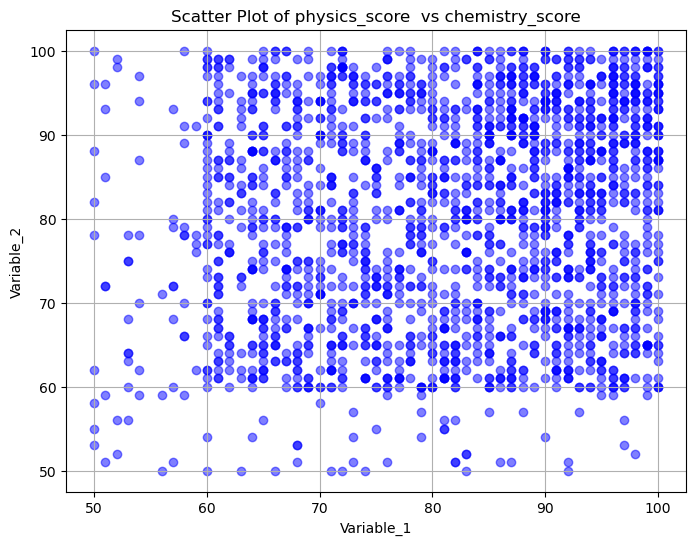

In [5]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['physics_score'], student_data['chemistry_score'], color='blue', alpha=0.5)
plt.title('Scatter Plot of physics_score  vs chemistry_score')
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
plt.grid(True)
plt.show()


## 2.3 Heatmap:

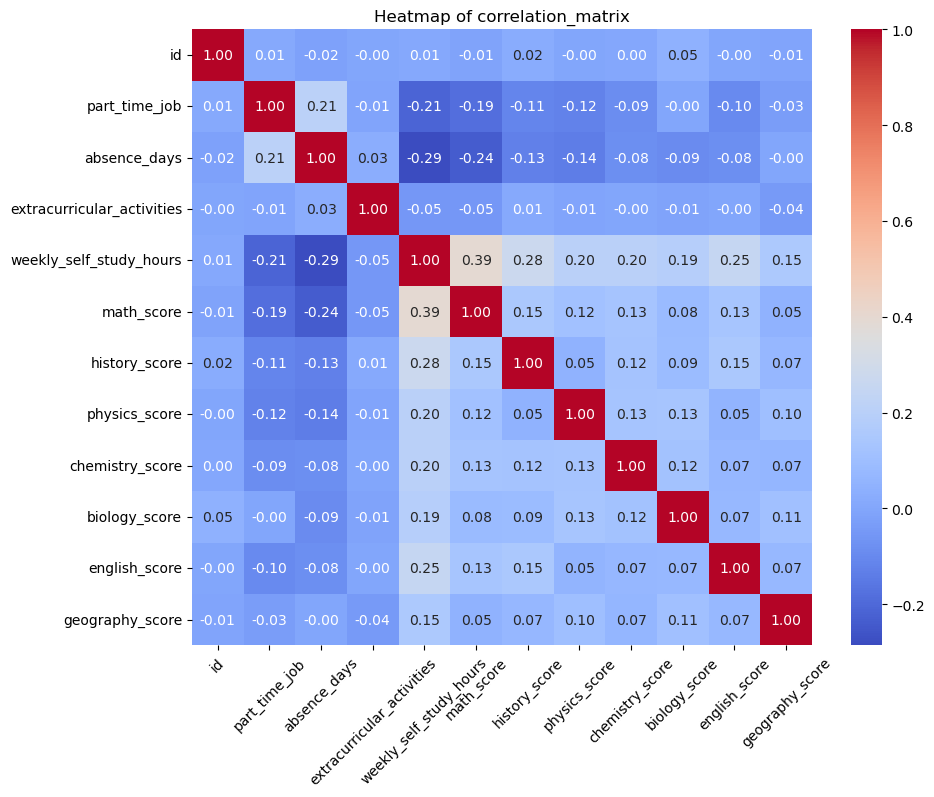

In [6]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = student_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of correlation_matrix')
plt.xticks(rotation=45)


plt.show()


## 3. Elbow Plot:

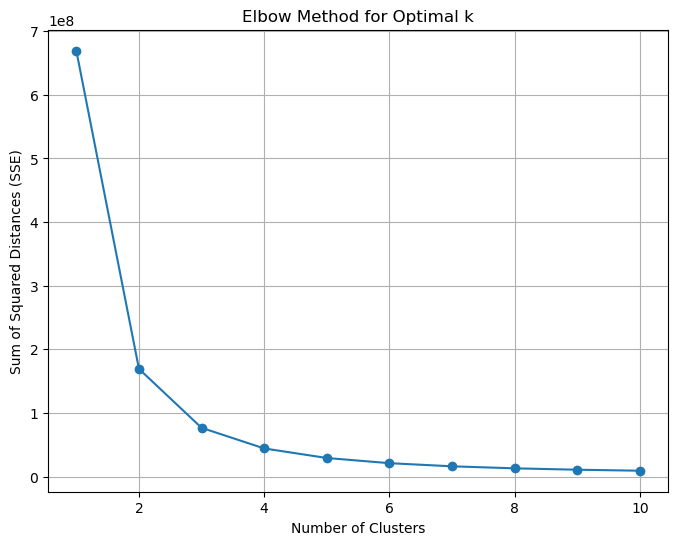

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop non-numeric columns
student_data_numeric = student_data.select_dtypes(include=['number'])

# Initialize an empty list to store the sum of squared distances
sse = []

# Define the range of number of clusters
k_range = range(1, 11)

# Iterate over the range of k values
for k in k_range:
    # Initialize KMeans model with current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the student_data
    kmeans.fit(student_data_numeric)
    
    # Append the sum of squared distances to list
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## Data Clustering Labels:

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

def perform_clustering(student_data, num_clusters):
    """
    Function to perform k-means clustering.

    Parameters:
    - student_data: student_dataFrame, input student_data for clustering
    - num_clusters: int, number of clusters to create

    Returns:
    - labels: array, cluster labels assigned to each student_data point
    """
    # Encode categorical variables
    encoder = LabelEncoder()
    student_data_encoded = student_data.copy()
    for column in student_data_encoded.columns:
        if student_data_encoded[column].dtype == 'object':
            student_data_encoded[column] = encoder.fit_transform(student_data_encoded[column])

    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit the model to the student_data
    kmeans.fit(student_data_encoded)

    # Get cluster labels
    labels = kmeans.labels_

    return labels

# Drop non-numeric columns
student_data_numeric = student_data.select_dtypes(include=['number'])

# Perform clustering
num_clusters = 3

# Perform clustering
cluster_labels = perform_clustering(student_data_numeric, num_clusters)

print("Cluster Labels:", cluster_labels)

Cluster Labels: [1 1 1 ... 0 0 0]


## 4.1 K-Means Clustering:

Text(0, 0.5, 'Chemistry Score')

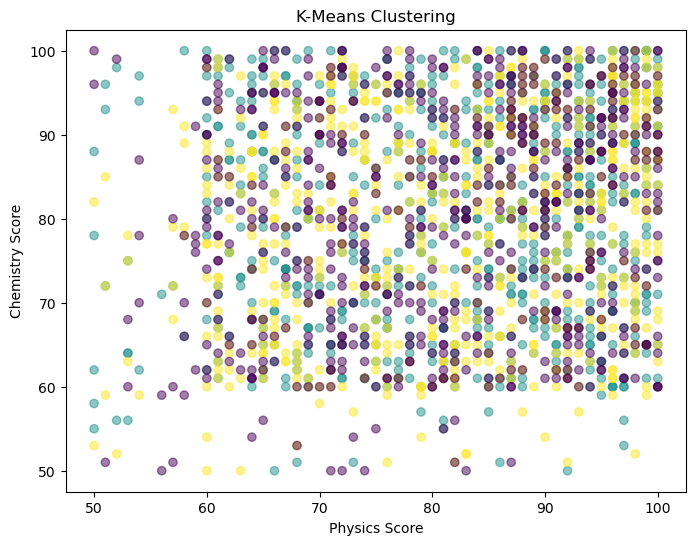

In [9]:
# Drop non-numeric columns
student_data_numeric = student_data.select_dtypes(include=['number'])

# Perform K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(student_data_numeric)
cluster_labels = kmeans.labels_

# Plot the data points with cluster colors
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
plt.scatter(student_data['physics_score'], student_data['chemistry_score'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Physics Score')
plt.ylabel('Chemistry Score')

## 4.2 Scatter Plot With Linear Regression Line:

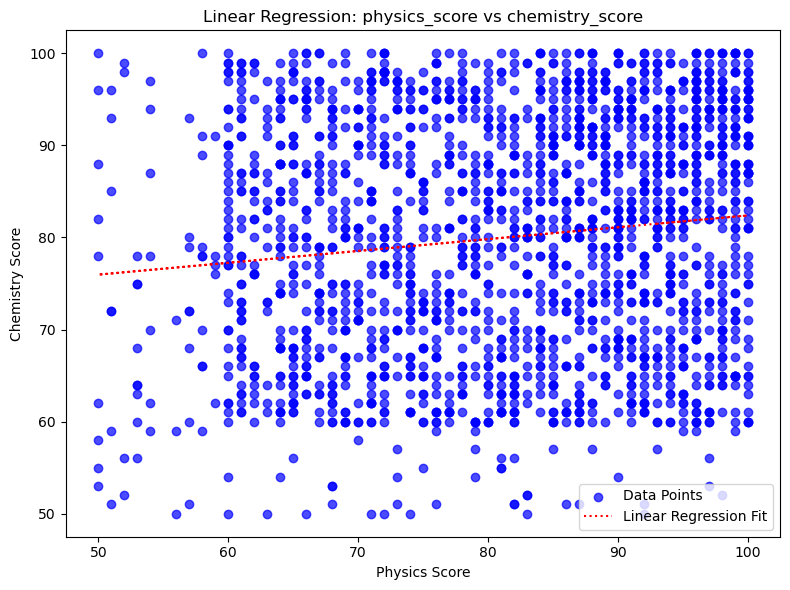

In [10]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
x = student_data[['physics_score']]
y = student_data['chemistry_score']

# Perform linear regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x, y)

# Scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data Points')
plt.plot(x, linear_regression_model.predict(x), color='red', linestyle='dotted', label='Linear Regression Fit')
plt.title('Linear Regression: physics_score vs chemistry_score')
plt.xlabel('Physics Score')
plt.ylabel('Chemistry Score')
plt.legend()

plt.tight_layout()
plt.show()
